# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>
    
## <font color="blue">Solução dos Exercícios</font>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

<font color='red'> Recomendamos fortemente resolver os exercícios sem consultar as soluções antecipadamente </font>

Os exercícios abaixo fazem uso da coleção de documentos presente no diretório `DocCol2` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

### Exercício 1)
Armazene os documentos disponíveis no diretório `DocCol2` em um dicionário onde a chave é o nome do arquivo e o valor é a string contida no arquivo.

In [1]:
# Lendo o documento como uma string
import glob  # glob é um pacote que permite varrer arquivos e 
             # diretorios utilizando sintaxe linux

files = glob.glob("DocCol2/*")

docs = {}
for fname in files:
    with open(fname,'r') as f:
        key = fname.split('/')[-1]
        docs[key] = f.read() 
        
print(docs.keys())

dict_keys(['ch9', 'ch38', 'ch31', 'ch7', 'ch36', 'ch37', 'ch1', 'ch30', 'ch6', 'ch39', 'ch8', 'au8', 'au1', 'au6', 'au7', 'au9', 'au15', 'au12', 'gr10', 'gr17', 'gr21', 'gr4', 'gr19', 'gr3', 'gr26', 'au13', 'au14', 'gr18', 'gr2', 'gr20', 'gr5', 'gr16', 'gr11', 'ch23', 'ch24', 'ch12', 'ch15', 'ch41', 'ch46', 'ch48', 'ch14', 'ch13', 'ch25', 'ch22', 'ch49', 'ch47', 'ch40', 'ch35', 'ch3', 'ch32', 'ch4', 'ch50', 'ch33', 'ch5', 'ch34', 'ch2', 'au5', 'au2', 'au3', 'au4', 'gr14', 'gr9', 'gr13', 'gr25', 'gr22', 'gr7', 'au11', 'gr23', 'gr6', 'gr1', 'gr24', 'gr8', 'gr12', 'gr15', 'au10', 'ch45', 'ch42', 'ch18', 'ch27', 'ch20', 'ch29', 'ch16', 'ch11', 'ch43', 'ch44', 'ch10', 'ch28', 'ch17', 'ch21', 'ch19', 'ch26'])


### Exercício 2)
Percorra as strings armazenadas como valores no dicionário criado no exercício 1), concatenando-as em uma única string. Quebre a string gerada em uma lista de palavras.

**DICA**: Utilize <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>

In [2]:
import nltk

words = ''
for k,s in docs.items():   # concatenando as strings
    words = words+s
    
words = nltk.word_tokenize(words)  # lista de palavras
print(words[:10])

['From', ':', 'kempmp', '@', 'phoenix.oulu.fi', '(', 'Petri', 'Pihko', ')', 'Subject']


### Exercício 3)
Remova todas os "tokens" da lista criada no exercício 2) que sejam de comprimento 1 ou que contenham caractéres que não são letras do alfabeto. Faça com que todas as palavras estajam em letras minúsculas na lista resultante.

In [3]:
words = [w.lower() for w in words if w.isalpha() and len(w) != 1]
print(words[:20])

['from', 'kempmp', 'petri', 'pihko', 'subject', 're', 'atheist', 'views', 'on', 'christianity', 'was', 're', 'accepting', 'jeesus', 'in', 'your', 'heart', 'first', 'thank', 'collectively']


### Exercício 4)
Remova da lista de palavras resultante do exercício 3) todas as "stop_words". Lembre-se que as palavras são da língua inglesa.

In [4]:
from nltk.corpus import stopwords

# lista das stop words
stop_words = stopwords.words('english')

words = [w for w in words if w not in stop_words]
print(words[:20])

['kempmp', 'petri', 'pihko', 'subject', 'atheist', 'views', 'christianity', 'accepting', 'jeesus', 'heart', 'first', 'thank', 'collectively', 'people', 'given', 'good', 'answers', 'questions', 'jason', 'smith']


### Exercício 5) 
Faça a normalização léxica (stemming) das palavras da lista resultante do exercício 4) e remova palavras repetidas após a normalização. Quantas palavras foram removidas após a normalização léxica?

**Dica**: Utilize o método <font color='blue'>PorterStemmer</font> do pacote <font color='blue'>nltk.stem</font>

In [5]:
from nltk.stem import PorterStemmer

n_antes = len(words)
print(n_antes)
words = [PorterStemmer().stem(w) for w in words]
words = list(set(words))
n_depois = len(words)
print('Foram removidas ',n_antes-n_depois,' palavras')

#print(len(words),words[:20])

47075
Foram removidas  40313  palavras


### Exercício 6) 
Gere uma lista de palavras para cada documento armazenado como valores no dicionário do exercício 1) aplicando os passos dos exercícios de 2 a 5 para cada documento.
Porém, no passo 5 não remova palavras repetidas após a normalização léxica. Armazene o resultado em um novo dicionário onde as chaves são os nomes dos documentos, como no dicionário do exercício 1), e os valores são as listas de palavras geradas para cada documento.

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from collections import Counter

In [7]:
# stop_words = stopwords.words('english')
# docsXwords = {}
# for key, value in docs.items():
#     words = nltk.word_tokenize(value)
#     words = [w.lower() for w in words if w.isalpha() and len(w) != 1]
#     words = [w for w in words if w not in stop_words]
#     words = [PorterStemmer().stem(w) for w in words]
#     docsXwords[key] = words

In [ ]:
stop_words = stopwords.words('english')
all_words = []
doc_names = []
for key, value in docs.items():
    words = nltk.word_tokenize(value)
    words = [w.lower() for w in words if w.isalpha() and len(w) != 1]
    words = [w for w in words if w not in stop_words]
    words = [PorterStemmer().stem(w) for w in words]
    string = " ".join(words)
    
    all_words.append(string)
    doc_names.append(key)

### Exercício 7)
Utilize o dicionário contruído no exercício anterior para construir
uma matriz Documentos $\times$ Palavras para a coleção de documentos contidos no diretório `DocCol2`.

In [8]:
# # unificando todas as palavras em uma única lista
# corpus = [palavras for sublista in list(docsXwords.values()) for palavras in sublista]

# # removendo repeticoes
# corpus = list(set(corpus))

# df_dXp = pd.DataFrame(data=np.zeros((len(list(docs.keys())),len(corpus))),
#                       index = list(docs.keys()), columns = corpus)

# for key,value in docsXwords.items():
#     dtemp = dict(Counter(value))
#     df_dXp.loc[key,list(dtemp.keys())] = list(dtemp.values())
    
# print(df_dXp.head())

In [132]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Criando lista com strings dos documentos e lista com nomes dos doc (se usar versao antiga do loop de limpeza)
# docsXwords_list = list(docsXwords.items())
# all_words = [" ".join(words) for doc, words in docsXwords_list]
# doc_names = [doc for doc, words in docsXwords_list]

# Criando bag-of-words
cv = CountVectorizer() # ou TfidfVectorizer()
bow = cv.fit_transform(all_words)
bow = bow.todense()
df_dXp = pd.DataFrame(bow, columns=cv.get_feature_names_out(), index=doc_names)

In [133]:
df_dXp.head()

,aaai,aacc,aaron,aaronc,ab,abandon,abbot,abbrevi,abc,abel,...,zf,zhao,zilch,zone,zoom,zopfi,zorg,zorn,zur,zwingli
ch9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch36,0,0,4,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Exercício 8)
Utilizando PCA, projete a coleção de documentos no espaço gerado pelas duas direções principais da matriz Documentos $\times$ Palavras.

In [117]:
df_dXp

,aaai,aacc,aaron,aaronc,ab,abandon,abbot,abbrevi,abc,abel,...,zf,zhao,zilch,zone,zoom,zopfi,zorg,zorn,zur,zwingli
ch9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch36,0,0,4,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_dXp)
df_dXp_scaled = pd.DataFrame(X_scaled, columns=df_dXp.columns, index=df_dXp.index)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_dXp_scaled)

In [120]:
X_pca.shape

(91, 2)

### Exercício 9)
Visualize a projeção da coleção de documentos no espaço bidimensional gerado no exercício anterior e se necessário faça um zoom para melhor visualizar a distribuição dos documentos.

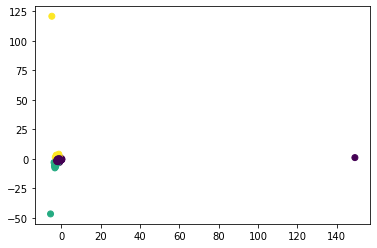

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_pca[:, 0],X_pca[:, 1],c=doc_class)

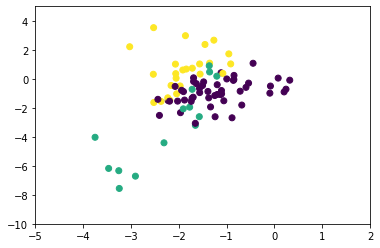

In [122]:
fig, ax = plt.subplots()
ax.set_xlim(-5, 2)
ax.set_ylim(-10, 5)

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)

### Exercício 10)
Dado o documento `au8` (linha de rótulo `au8` no DataFrame Documentos $\times$ Palavras) e utilizando a distância "cosseno"  (cosseno entre dois vetores correspondendo a vetorização dos documentos), encontre qual o documento mais parecido com `au8`. Calcule o cosseno entre a linha representada por `au8` na matriz Documentos $\times$ Palavras e todas as outras linhas, tomando o maior valor como correspondendo ao documento mais parecido.
Repita a projeção realizada no exercício 8), ressaltando o documento `au8` e o documento mais parecido com ele. 

In [123]:
df_dXp_scaled.head()

,aaai,aacc,aaron,aaronc,ab,abandon,abbot,abbrevi,abc,abel,...,zf,zhao,zilch,zone,zoom,zopfi,zorg,zorn,zur,zwingli
ch9,-0.105409,-0.105409,-0.120743,-0.202953,-0.177443,-0.173749,-0.105409,-0.142054,-0.105409,-0.105409,...,-0.105409,-0.105409,-0.105409,-0.105409,-0.149906,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409
ch38,-0.105409,-0.105409,-0.120743,-0.202953,-0.177443,-0.173749,-0.105409,-0.142054,-0.105409,-0.105409,...,-0.105409,-0.105409,-0.105409,-0.105409,-0.149906,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409
ch31,-0.105409,-0.105409,-0.120743,-0.202953,-0.177443,-0.173749,-0.105409,-0.142054,-0.105409,-0.105409,...,-0.105409,-0.105409,-0.105409,-0.105409,-0.149906,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409
ch7,-0.105409,-0.105409,-0.120743,-0.202953,-0.177443,-0.173749,-0.105409,-0.142054,-0.105409,-0.105409,...,-0.105409,-0.105409,-0.105409,-0.105409,-0.149906,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409
ch36,-0.105409,-0.105409,0.693157,5.953289,-0.177443,-0.173749,-0.105409,-0.142054,-0.105409,-0.105409,...,-0.105409,-0.105409,-0.105409,9.486833,-0.149906,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409


In [124]:
def cosine_similarity(a, b):
    a, b = a.values, b.values    
    return np.dot(a, b)/(np.linalg.norm(a) * np.linalg.norm(b))

query = df_dXp_scaled.loc['au8']
cos_sims = df_dXp_scaled.apply(lambda x: cosine_distance(x, query), axis=1)

cos_sims.sort_values(ascending=False)

au8     1.000000
au7     0.479730
au12    0.131970
au15    0.117471
au14    0.031992
          ...   
ch11   -0.034483
ch32   -0.034983
ch26   -0.035756
ch24   -0.038440
ch40   -0.039275
Length: 91, dtype: float64

In [125]:
idx_query = np.where(df_dXp_scaled.index == 'au8')[0][0]
idx_prox = np.where(df_dXp_scaled.index == 'au7')[0][0]

print(idx_query, idx_prox)

11 14


(-10.0, 5.0)

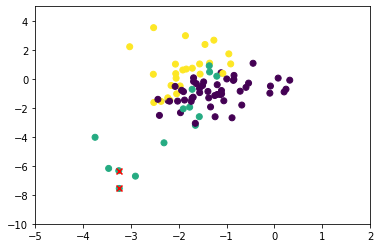

In [126]:
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)
plt.scatter(Xpca[[idx_query, idx_prox],0],Xpca[[idx_query, idx_prox],1], marker='x', color='red')
plt.xlim(-5, 2)
plt.ylim(-10, 5)